# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [51]:
# PROJECT OVERVIEW:
# The intended audience of this project is corporate responsibility/supply chain due diligence analysts in companies that import/sell timber
# in the US that was imported from Mexico.
# My first objective is to determine if there is a relationship between deforestation and violent conflict in Mexico.
# I may possibly create a risk index for states factoring in the degree of conflict, degree of forest loss, and type of forest loss driver. 
# This would be a useful tool for companies conducting due diligence/identifyin risk.

# I'm using three datasets and combining them:
# - 1: Conflict events in Mexico                     (Source: ACLED [Armed Conflict Location and Event Data])
# - 2: Tree cover loss in Mexico by region (admin)   (Source: Global Forest Watch, GFW)
# - 3: Tree cover loss in Mexico by driver           (Source: GFW)

# Notes on the datasets:
# # - Both datasets from GFW share a year column named 'umd_tree_cover_loss__year'
# ACLED dataset:
# # - Data from January 1 2018 to Dec 31 2023 downloaded from ACLED's website. Data earlier than this is not available from ACLED.
# # - The dataset includes data on protests/riots but I did not download these as I am focusing on armed conflict.
# # - ACLED reports location data for multiple admin levels and GPS coordinates. The 'admin1' column is comparable to GFW's 'adm'
# GFW datasets:  Location is reported as 'adm1', which refers to states.
# # - Tree cover loss data is reported in hectares. 1000 hectares = 1 kilo hectare. I will refer to this as 'forest loss' to keep it

# Questions I have going into this EDA:
# - What does each row of data represent in both datasets?
# - What are the values aggregated by?
# - What is the size of the dataset?
# - Is any data missing?
# - What are the categories of ‘forest loss drivers’?
# - Are the column headings comparable in both datasets?
# - Any trends that stick out so far?
# - Which columns should I drop?

import pandas as pd
# Load the ACLED conflict csv file into a dataframe:
conflict_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/eda-checkpoint/ACLED_Mexico Conflict Data.csv')

# Load the 2 GFW csv files into separate dataframes:
driver_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/eda-checkpoint/GFW_Mexico_treecover_loss__ha.csv')
admin_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/eda-checkpoint/GFW_Mexico_loss by region.csv')

# Join the two forest dataframes on their columns with the year with an 'outer' merge (on year) to retain the data that is not the same 
# (e.g both have forest loss columns but the unit of analysis is different (admin vs driver)). Add a suffix on the shared columns to keep them distinguishable
forest_df = pd.merge(driver_df, admin_df, on='umd_tree_cover_loss__year', how='outer', suffixes=('_driver', '_admin'))

# Rename several columns to make them easier reference in EDA and to match the conflict_df: rename the 'umd_tree_cover_loss__year' to 'year'
# and 'adm' to 'admin1' to match the corresponding columns in conflict_df.
forest_renamed = forest_df.rename(columns={'umd_tree_cover_loss__year': 'year', 'adm1': 'admin1', 'tsc_tree_cover_loss_drivers__driver': 'driver', 'umd_tree_cover_loss__ha_driver': 'forest_loss_by_driver', 'umd_tree_cover_loss__ha_admin': 'forest_loss_by_admin'})

# Merge the conflict and forest dataframes on 'year' with an outer join to retain all columns.
merged_df = pd.merge(forest_renamed, conflict_df, on=['year','admin1'], how='outer')
merged_df.head()



,driver,year,forest_loss_by_driver,gfw_gross_emissions_co2e_all_gases__Mg_driver,iso_x,admin1,forest_loss_by_admin,gfw_gross_emissions_co2e_all_gases__Mg_admin,event_id_cnty,event_date,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,Commodity driven deforestation,2001,30009.328237,8.492504e+06,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Urbanization,2001,865.735246,1.912652e+05,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unknown,2001,2526.940860,4.566551e+05,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wildfire,2001,1826.876308,3.864465e+05,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forestry,2001,6484.983381,1.556750e+06,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [52]:
# Find the shape of the merged dataframe. 
print(merged_df.shape)
# The dataframe has 260952 rows and 38 columns
 



(38513, 37)


In [53]:
# Identify all of the column headers:
print(merged_df.columns)

Index(['driver', 'year', 'forest_loss_by_driver',
       'gfw_gross_emissions_co2e_all_gases__Mg_driver', 'iso_x', 'admin1',
       'forest_loss_by_admin', 'gfw_gross_emissions_co2e_all_gases__Mg_admin',
       'event_id_cnty', 'event_date', 'time_precision', 'disorder_type',
       'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1', 'inter1',
       'actor2', 'assoc_actor_2', 'inter2', 'interaction',
       'civilian_targeting', 'iso_y', 'region', 'country', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'tags', 'timestamp'],
      dtype='object')


In [54]:
# Check the datatypes: 
print(merged_df.dtypes)

driver                                            object
year                                               int64
forest_loss_by_driver                            float64
gfw_gross_emissions_co2e_all_gases__Mg_driver    float64
iso_x                                             object
admin1                                            object
forest_loss_by_admin                             float64
gfw_gross_emissions_co2e_all_gases__Mg_admin     float64
event_id_cnty                                     object
event_date                                        object
time_precision                                   float64
disorder_type                                     object
event_type                                        object
sub_event_type                                    object
actor1                                            object
assoc_actor_1                                     object
inter1                                            object
actor2                         

In [56]:
# Find the descriptive statistics of selected columns (only numeric ones since there are many 'objects')
forest_loss_overview = merged_df[['forest_loss_by_driver', 'forest_loss_by_admin']].describe()
print(forest_loss_overview)
# I'm curious why these are showing different results (Besides the count). I would assume the total values would be the same (e.g mean) 
# even though the forest data is grouped differently. Perhaps this is the wrong application of a pivot table.

       forest_loss_by_driver  forest_loss_by_admin
count           35790.000000          35790.000000
mean            41468.988395           6104.228918
std             66195.063368           9948.573275
min               183.033309              0.071586
25%              1451.345566            247.949687
50%              5439.455333           3359.650389
75%             59559.544183           7038.264661
max            244467.937745          80949.900575


In [28]:
# Find the unique types of 'drivers' for forest loss (GFW)
forest_loss_drivers = merged_df['tsc_tree_cover_loss_drivers__driver'].unique()
print(forest_loss_drivers)
# Result: 'Commodity driven deforestation', 'Urbanization', 'Unknown', 'Wildfire', 'Forestry' 'Shifting agriculture', nan

['Commodity driven deforestation' 'Urbanization' 'Unknown' 'Wildfire'
 'Forestry' 'Shifting agriculture' nan]


In [57]:
# Find the unique types of conflict event types (ACLED)
conflict_event_types = merged_df['event_type'].unique()
print(conflict_event_types)
# Result: battles and explosions/remote violence

[nan 'Battles' 'Explosions/Remote violence']


In [58]:
# Identify how many nulls there are in the df:
print(merged_df.isnull().sum())
# There are no nulls in the forest data. The conflict dataset does have nulls. Some may
# likely be due to there not being relevant data for a category of data was not relevant to the event type.

driver                                            2723
year                                                 0
forest_loss_by_driver                             2723
gfw_gross_emissions_co2e_all_gases__Mg_driver     2723
iso_x                                             2723
admin1                                               0
forest_loss_by_admin                              2723
gfw_gross_emissions_co2e_all_gases__Mg_admin      2723
event_id_cnty                                     3564
event_date                                        3564
time_precision                                    3564
disorder_type                                     3564
event_type                                        3564
sub_event_type                                    3564
actor1                                            3564
assoc_actor_1                                    37817
inter1                                            3564
actor2                                            3728
assoc_acto

In [59]:
# How many administrative areas (admin1) are in the dataset?
print(len(merged_df['admin1'].unique()))
# This results in 41 unique admins, but Mexico has 31 states.

41


In [42]:
# Find the first and last date for the conflict data dataset:
merged_df['event_date'] = pd.to_datetime(merged_df['event_date'])
earliest_conflict_date = merged_df['event_date'].min()
print(earliest_conflict_date)
last_conflict_date = merged_df['event_date'].max()
print(last_conflict_date)
# Results: Jan 1 2018 to Dec 31 2023

2018-01-01 00:00:00
2023-12-31 00:00:00


In [43]:
# Notes from this EDA that will inform data cleaning:
# # The dataset has 16951 rows and 37 columns - 
# # The following columns are not relevant to my research scope so I will drop them:
# # -- ACLED: 'inter1', 'inter2', 'interaction', 'civilian_targeting', 'iso_y', 'region', 'admin2', 'admin3', 'source', 'source_scale', 'notes', 'tags','timestamp’, 'gfw_gross_emissions_co2e_all_gases__Mg_admin', 'time_precision'
# # -- GFW: 'gfw_gross_emissions_co2e_all_gases__Mg_driver', 'iso_x'
# # Given that I found 41 unique admins but Mexico has 31 states - look for errors in the spellings. I assume some have accents and some do not (é vs e). 
# # There are no nulls in the forest data. The conflict data does have nulls, but these are likely due to a lack of relevant data in the category (e.g only one actor involved so no data in 'actor 2), not an error.
# # I will need to remember to note that some deforestation is caused by 'unknown' 'driver'.
# # Need to see what 'nan' means in the 'driver' and 'event_type' columns.

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

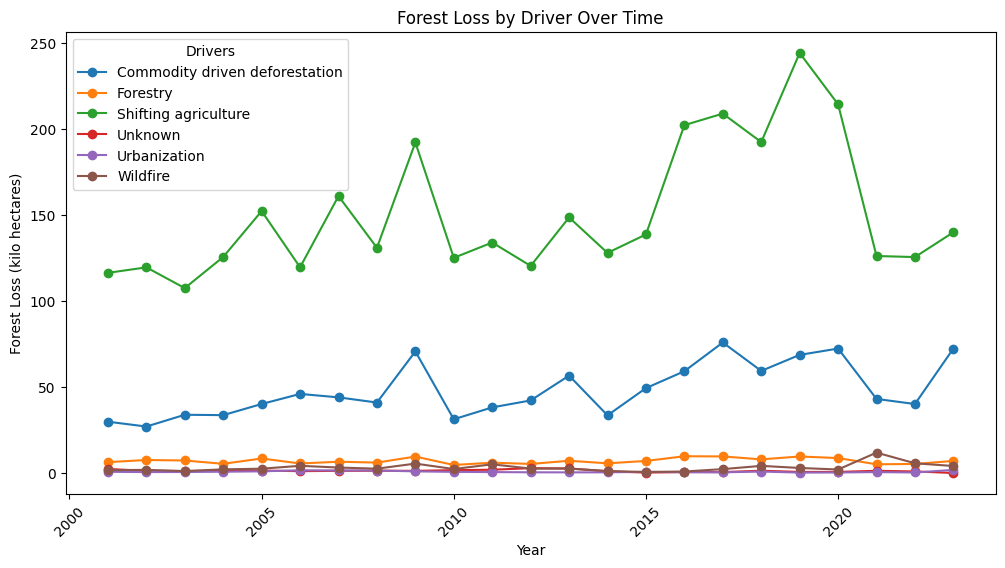

In [60]:
# I want to get a look at the trends in forest loss by driver. To do that, I will use a multi-line chart 
# to visualize forest loss over time by type of driver.

import matplotlib.pyplot as plt 

# Convert hectares to kilo hectares (1 kilo hectare = 1000 thousands hectares) - otherwise the chart is too stretched. 
merged_df['forest_loss_thousands'] = merged_df['forest_loss_by_driver'] / 1000

# Use a pivot table on the dataframe to select the data to be graphed.
forest_loss_by_driver = merged_df.pivot_table(index='year', columns='driver', values='forest_loss_thousands')

# plot the line chart
plt.figure(figsize=(12,6))
# separate the lines by driver.
for driver in forest_loss_by_driver.columns:
    plt.plot(forest_loss_by_driver.index, forest_loss_by_driver[driver], marker='o', linestyle='-', label=driver)
# add labels 
plt.xlabel('Year')
plt.ylabel('Forest Loss (kilo hectares)')
plt.title('Forest Loss by Driver Over Time')
plt.xticks(rotation=45)
plt.legend(title='Drivers')
plt.show()
# Notes: 
# - At first I prepared the data using 'groupby' with .sum() but I realized it was inaccurate since I don't need to aggregate the values. The forest loss is already aggregtaed by driver. So I used a pivot table instead.
# - Initial observations show 'shifting agriculture' (not a form of deforestation according to GFM) is the main driver of tree cover loss.
# - Commoidy-driven deforestation is the second highest driver, which is a form of permanent deforestation.
# - I see that 'unknown' accounts for a small fraction of the trend that it won't impact the overall findings. 

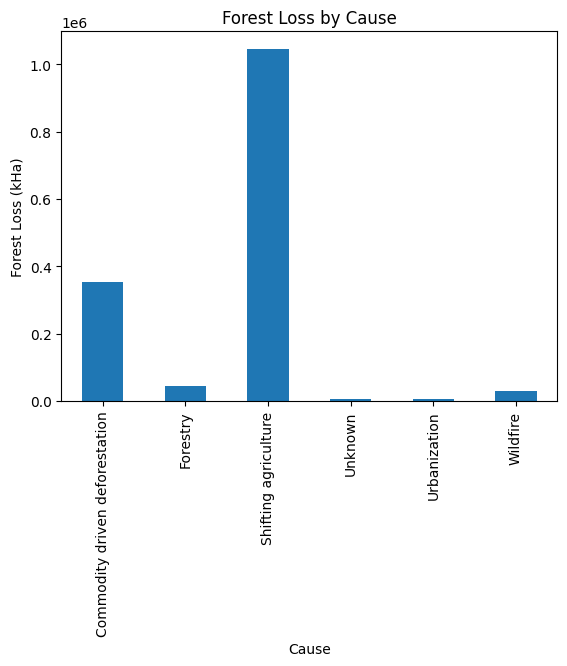

In [62]:
# Because of how disparate the higest category is from the lowest, it is difficult to see variation in the lower drivers. 
# I also want to compare the drivers in total (aggregated year). Therefore I will use a bar chart to compare the drivers side by side.
import matplotlib.pyplot as plt 

# Convert hectares to kilo hectares (thousands of hectares). 
merged_df['forest_loss_thousands'] = merged_df['forest_loss_by_driver'] / 1000

# Group the data by driver and sum the forest loss across all years.
cause_by_year = merged_df.groupby('driver')['forest_loss_thousands'].sum()

cause_by_year.plot.bar(xlabel="Cause",ylabel="Forest Loss (kHa)", title="Forest Loss by Cause")
plt.show()


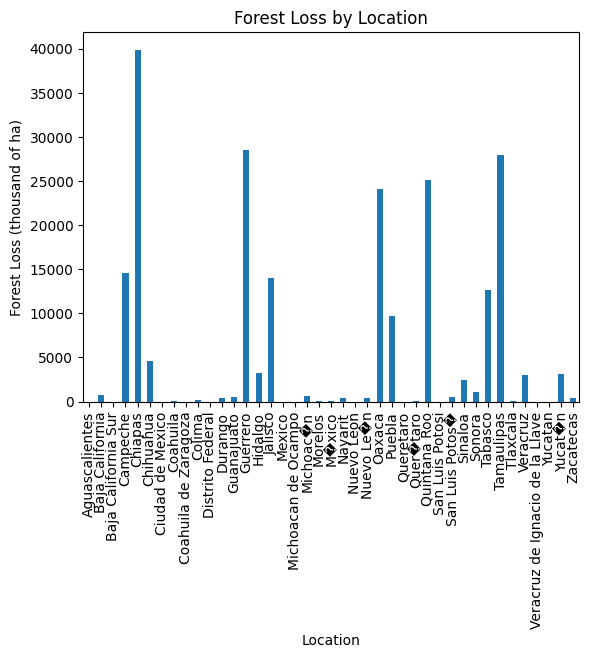

In [64]:

# Now I want to look at forest loss across locations (admin1) in Mexico to get a sense of the general trend. 
# To accomplish this I will make a bar chart for easy comparison.

# Convert hectares to thousands of hectares. 
merged_df['forest_loss_thousands'] = merged_df['forest_loss_by_admin'] / 1000

# Group the data by location (admin1) and sum the forest loss across all years.
cause_by_year = merged_df.groupby('admin1')['forest_loss_thousands'].sum()

# Graph the data and asign labels. 
cause_by_year.plot.bar(xlabel="Location",ylabel="Forest Loss (thousand of ha)", title="Forest Loss by Location")
plt.show()

# This shows me that some of the locations are duplicated. I can see some have accents and some do not. 
# Chiapas has significantly higher forest loss than any other state, with Tamaulipas and Campeche in 2nd and 3rd.  


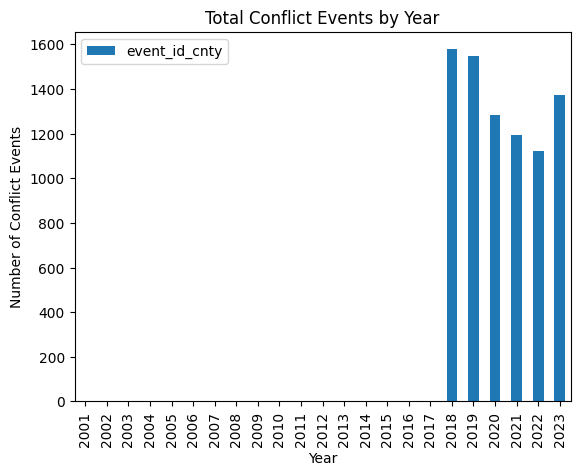

In [66]:
# Now I will do the same with the conflict data to look at the trend over time and spot any inconsistencies.

# Group the data by year and find the number of unique 'event_id_cnty' to get the count. And reset the index in the new dataframe.
grouped_data2 = merged_df.groupby('year')['event_id_cnty'].nunique().reset_index()

# Graph the data 
grouped_data2.plot.bar(x='year', y='event_id_cnty', xlabel='Year', ylabel='Number of Conflict Events', title='Total Conflict Events by Year')
plt.show()
# This bar chart confirms I only have data from Jan 1 2018 to Dec 31 2023.

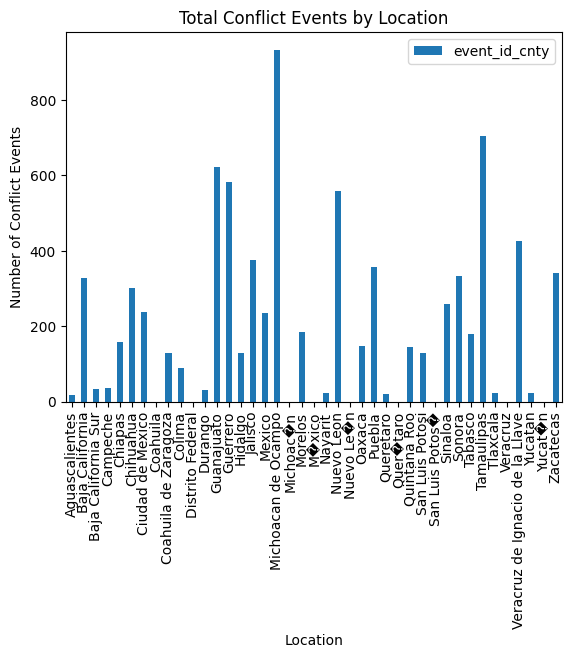

In [67]:
# Finally, compare conflict events by administrative location. 

# Group the data by locatin ('admin1') and find the number of unique 'event_id_cnty' to get the count. And reset the index in the new dataframe.
grouped_data2 = merged_df.groupby('admin1')['event_id_cnty'].nunique().reset_index()

# Graph the data 
grouped_data2.plot.bar(x='admin1', y='event_id_cnty', xlabel='Location', ylabel='Number of Conflict Events', title='Total Conflict Events by Location')
plt.show()
# Based on a quick look, I see that the highest conflict-affected admin was not the top of the forest list. But Chiapas and Tamaulipas do have 
# elevated conflict levels. 

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

I was surprised to find that the tree cover loss data had such a wide spread (some locations with very little and some with very high loss) that I had to convert the values from hectares to kilohectares to be able to graph it.
The EDA helped me to identify some errors in the dataset, namely that I have too many administrative zones compared to actual states in Mexico.
I was also surprised to see that there is an 'unknown' category of forest loss 'driver', which I initially did not know was included. But after doing EDA, I found that it is quite small and so that unknown does not sifnificantly affect my analysis. 
Finally, the EDA gave me a glimpse of trends that I will drill into later in the analysis portion. I was surprised to see that conflict data has so many nulls, but based on reading their methodology guide, I do not think these were errors but rather the specific data was not relevant.

2. Do you have any concerns about your dataset? 

At first one of my biggest concerns was that I only had conflict data from mid-2021 to mid-2024, whereas my forest data 
spanned many years. This meant I would only be able to analyze trends in 2022 and 2023. However, I reached out to ACLED and thankfully they gave me access to all of the data for Mexico (which dates back to January 1 2018).

I'm also a bit confused as to why the aggregated numbers for 'forest_loss_driver' and 'forest_loss_admin' are not the same in the descriptive statistics. I would think that although the data is grouped differently, the aggreagtions should be the same.

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

Yes, based on what I found in EDA, these are some of the things that I will do in data cleaning:
- Fix the spellings of admin1 location names to remove duplicated locations. 
- Rename column headings to be more brief and descriptive.
- Identify nulls in the conflict_df and figure out what I should do with them (I think they are mostly missing 'object' data, so I will fill them with 0 so that they won't affect any of the calculations.)
- The following columns are not relevant to my research scope so I will drop them:
    - ACLED: 'inter1', 'inter2', 'interaction', 'civilian_targeting', 'iso_y', 'region', 'admin2', 'admin3', 'source', 'source_scale', 'notes', 'tags','timestamp’, 'gfw_gross_emissions_co2e_all_gases__Mg_admin', 'time_precision'
    - GFW: GFW: 'gfw_gross_emissions_co2e_all_gases__Mg_driver', 'iso_x'
